In [0]:
# Decision Tree Classification

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xgboost as xgb
from PIL import Image, ImageDraw, ImageFont
from sklearn.metrics import confusion_matrix




In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [0]:
# Importing the dataset
dataset = pd.read_csv('Subject2.csv')


In [0]:
dataset

,Time,Drowsiness,Distraction,Blink Rate,Eye Aspect Ratio,x-coordinate,y-coordinate
0,10/23/2019 20:06,1,1,0,0.304057,249,218
1,10/23/2019 20:06,1,1,0,0.275000,268,212
2,10/23/2019 20:06,1,1,0,0.286364,263,213
3,10/23/2019 20:06,1,1,0,0.286364,264,213
4,10/23/2019 20:06,1,1,0,0.331818,261,207
...,...,...,...,...,...,...,...
17769,10/23/2019 20:17,1,1,140,0.414215,334,211
17770,10/23/2019 20:17,1,1,140,0.412159,332,214
17771,10/23/2019 20:17,1,1,140,0.393006,333,207
17772,10/23/2019 20:17,1,1,140,0.368474,330,210


In [0]:
X = dataset.iloc[:, [3, 4]].values
y = dataset.iloc[:, 1].values

In [0]:
X.shape,y.shape

((17774, 2), (17774,))

In [0]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [0]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [0]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [0]:
print("Report:",classification_report(y_test,y_pred.round()))
print("Accuracy:",accuracy_score(y_test,y_pred))

Report:               precision    recall  f1-score   support

           0       0.40      0.42      0.41        48
           1       0.99      0.99      0.99      4396

    accuracy                           0.99      4444
   macro avg       0.70      0.70      0.70      4444
weighted avg       0.99      0.99      0.99      4444

Accuracy: 0.986948694869487


In [0]:

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Blink Rate')
plt.ylabel('Eye Aspect Ratio')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


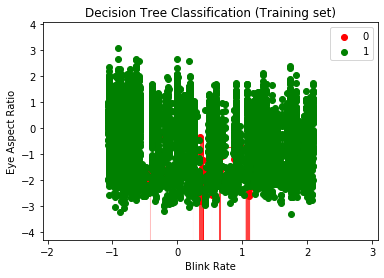

In [0]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Blink Rate')
plt.ylabel('Eye Aspect Ratio')
plt.legend()
plt.show()

In [0]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

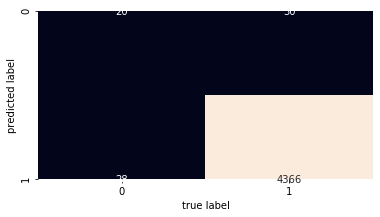

In [0]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

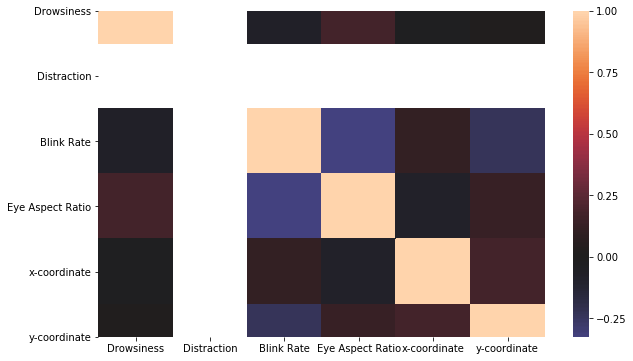

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(dataset.corr(), center=0)
